<p><a href="https://www.asu.edu.eg/"><img align="right" src="https://ums.asu.edu.eg/images/logo.png" width="100" /></a></p>
<div align=left>
<h1>
  Body Signal of Smoking 🚭
</h1>
    <h5>
        Data Analytics project
    </h5>
</div>
<br>
<br>

## Introduction
This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

## All libraries we need through the notebook

In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
from collections import Counter #for outliers detection
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
import plotly.express as px #for scatter 3d
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # for encoding and standardization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
%matplotlib inline

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
df = pd.read_csv('smoking.csv')
df.head(n = 10).style.background_gradient(cmap = "Blues")

In [3]:
# Drop ID
df = df.drop("ID", axis = 1)

In [4]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

####
#### We see thet the dataset attributes are divided into dependent and independent attributes.
#### The inedependent attributes are :
- `ID` : index
- `Gender`: The gender of the individual.
- `Age`: Age of the individual categorized into 5-year gaps.
- `Height`: Height of the individual in centimeters.
- `Weight`: Weight of the individual in kilograms.
- `Waist circumference`: Measurement of the individual's waist circumference in centimeters.
- `Eyesight (left)`: Assessment of the individual's eyesight in the left eye.
- `Eyesight (right)`: Assessment of the individual's eyesight in the right eye.
- `Hearing (left)`: Assessment of the individual's hearing ability in the left ear.
- `Hearing (right)`: Assessment of the individual's hearing ability in the right ear.
- `Systolic Blood Pressure`: Measurement of the pressure in the arteries when the heart beats.
- `Diastolic Blood Pressure`: Measurement of the pressure in the arteries when the heart is at rest.
- `Fasting Blood Sugar`: Measurement of blood sugar level after an overnight fast.
- `Cholesterol (total)`: Total cholesterol level in the blood.
- `Triglyceride`: Measurement of the level of triglycerides in the blood.
- `HDL Cholesterol`: Measurement of high-density lipoprotein (HDL) cholesterol level.
- `LDL Cholesterol`: Measurement of low-density lipoprotein (LDL) cholesterol level.
- `Hemoglobin`: Measurement of the amount of hemoglobin in the blood.
- `Urine Protein`: Presence of protein in the urine.
- `Serum Creatinine`: Measurement of the creatinine level in the blood.
- `AST` (glutamic oxaloacetic transaminase): Measurement of liver enzyme AST level.
- `ALT` (glutamic oxaloacetic transaminase): Measurement of liver enzyme ALT level.
- `GTP`: an energy-rich nucleotide analogous to ATP.
- `Oral Examination Status`: Status of oral examination.
- `Dental Caries`: Presence or absence of dental caries (cavities).
- `Tartar Status`: Status of tartar (hardened plaque) accumulation on teeth.<br>
#### The dependent attribute or (The target variable) is :
- `smoking`: NO smoking = N, YES smoking = Y

# Data Cleaning

In [5]:
# Checking the nulls
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [6]:
df.shape

(55692, 26)

In [7]:
# Droping the redundant data
#df = df.drop_duplicates()

In [8]:
df.shape

(55692, 26)

##### We see that there is no nulls in our dataset & we have removed the redundant data from our dataset<br>

### Checking and Removing the Outliers

In [9]:
df.head(n = 10).style.background_gradient(cmap = "Blues")

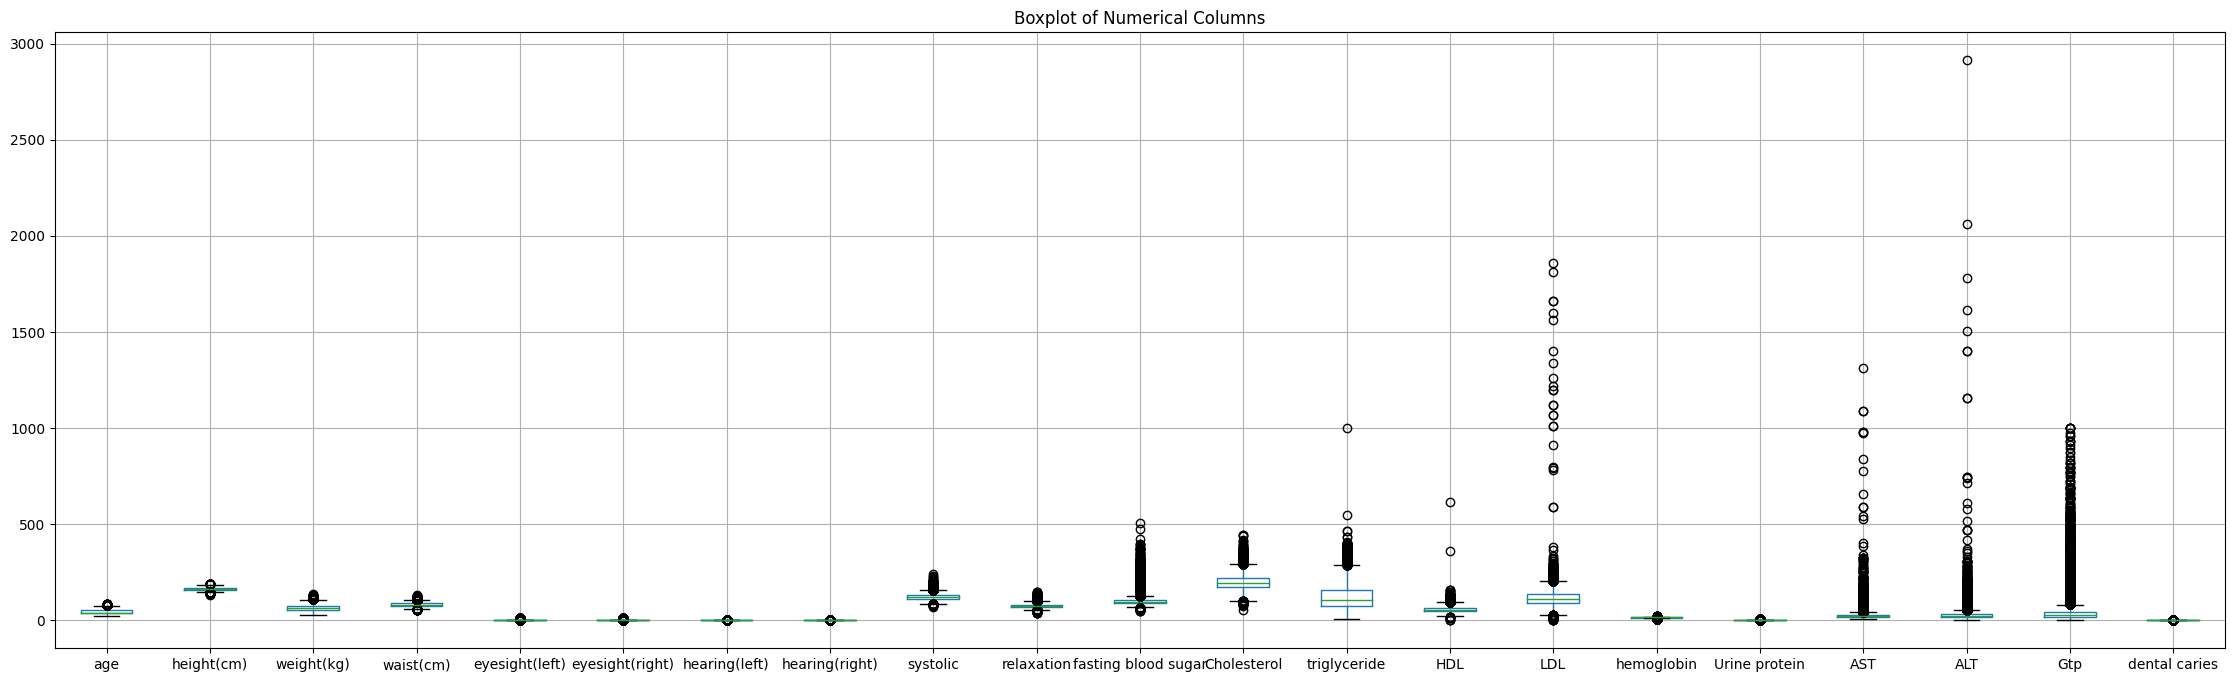

In [10]:
# Specify the columns to plot
numeric_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'AST', 'ALT', 'Gtp', 'dental caries']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(28,8))

# Create the boxplot
df[numeric_cols].boxplot(ax=ax)

# Set the plot title
ax.set_title('Boxplot of Numerical Columns')

# Show the plot
plt.show()

#### Plotting each column

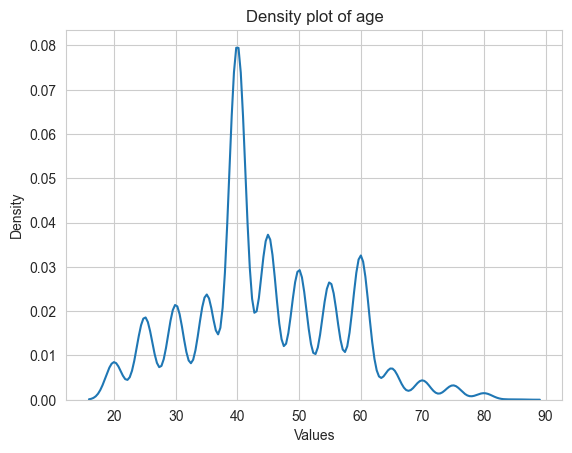

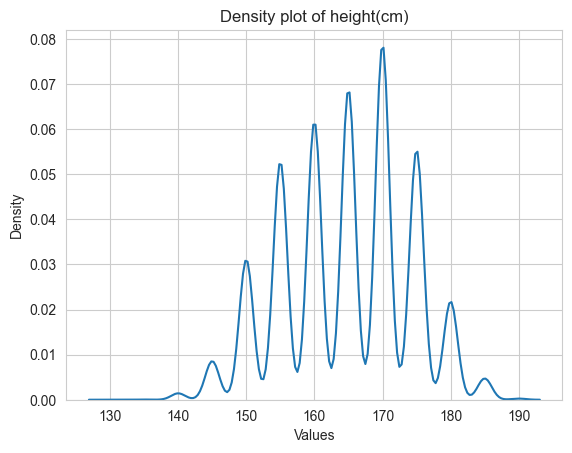

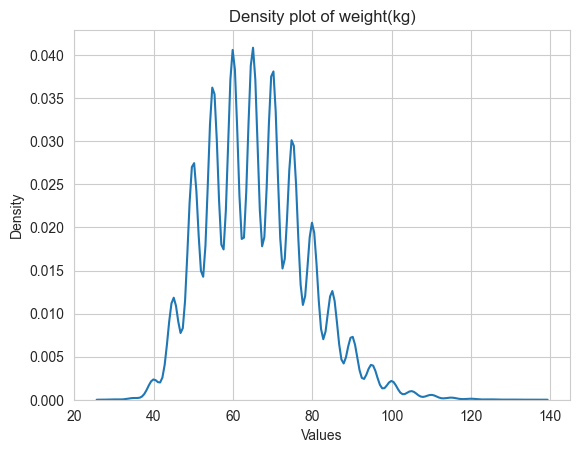

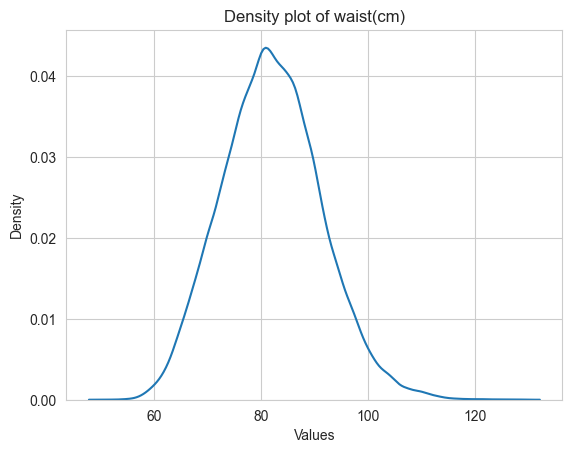

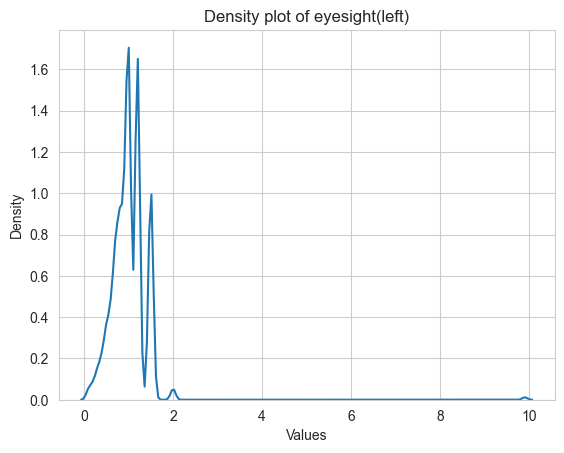

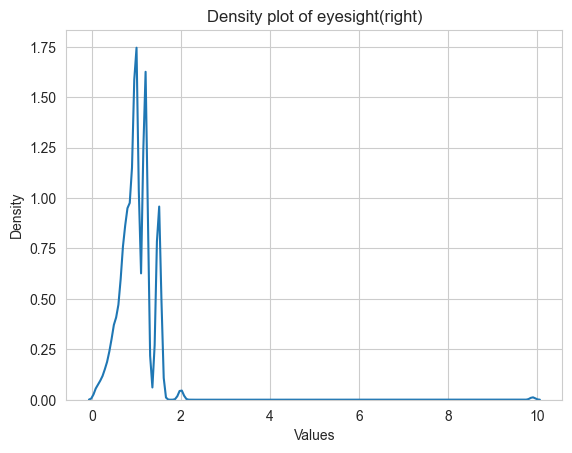

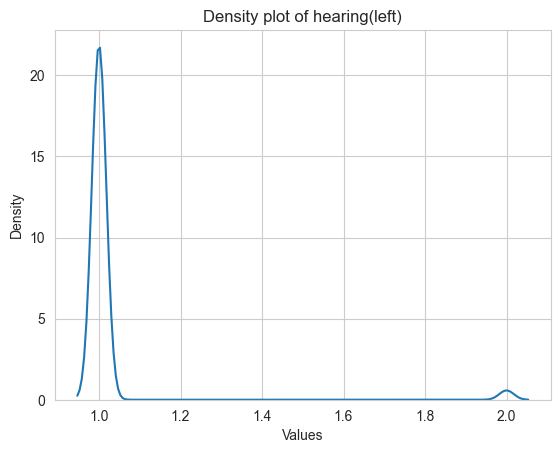

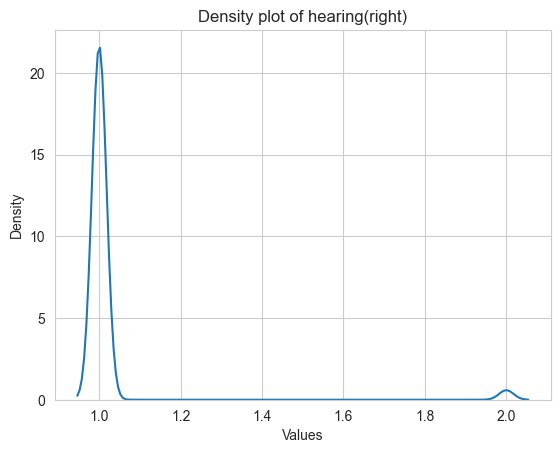

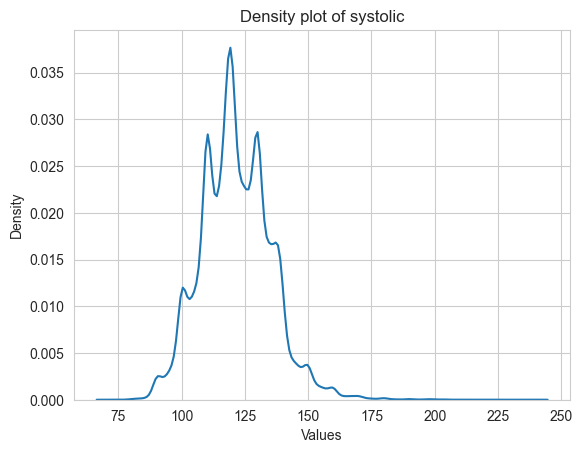

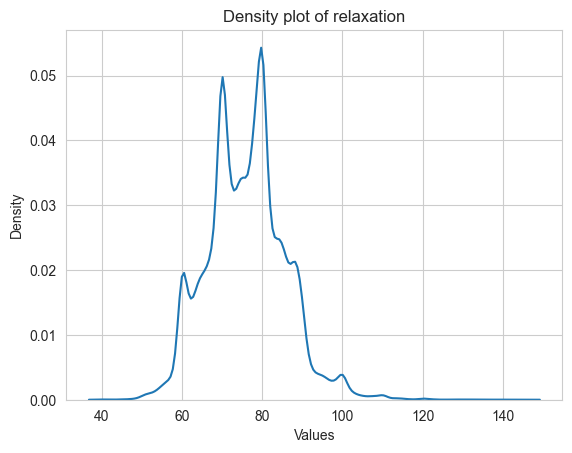

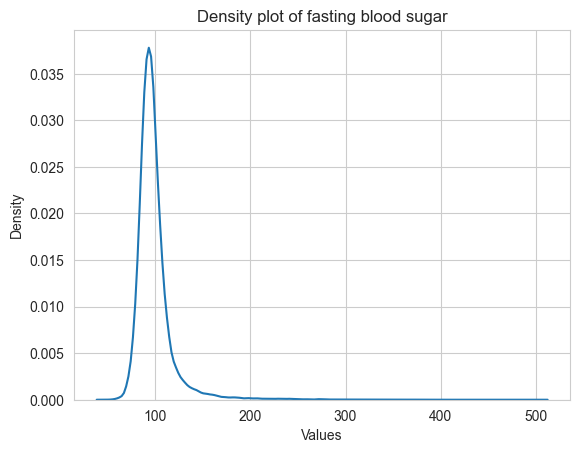

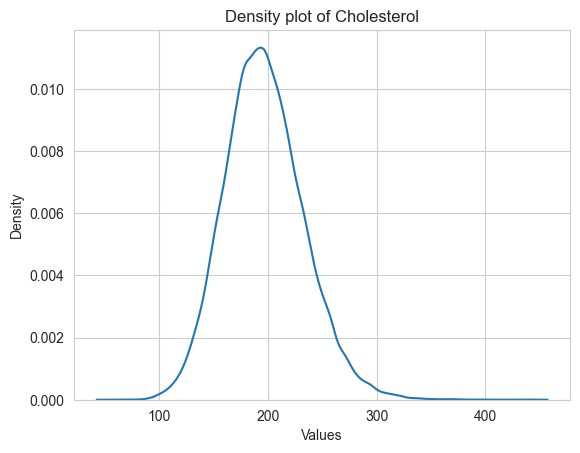

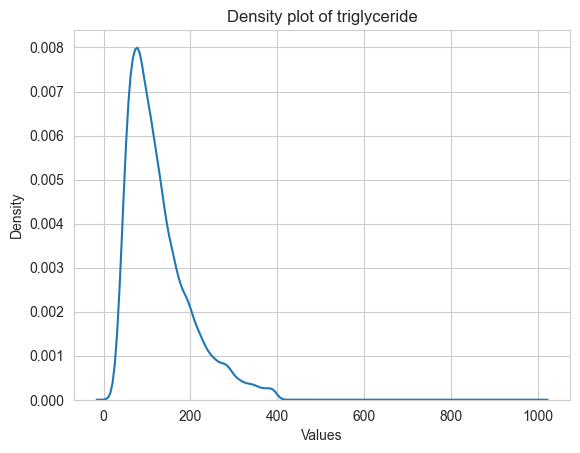

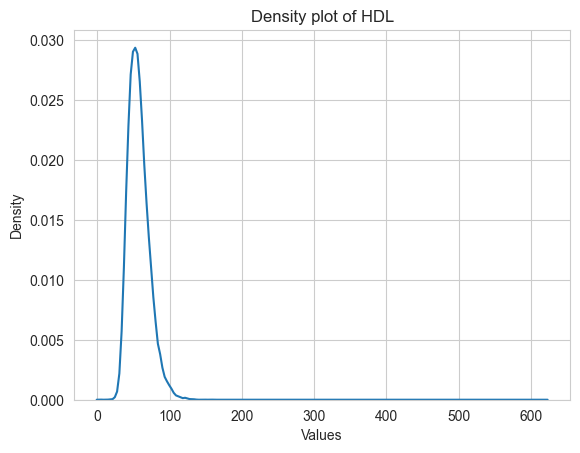

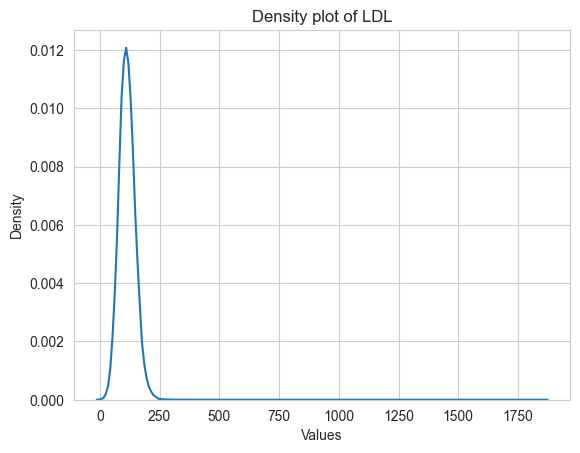

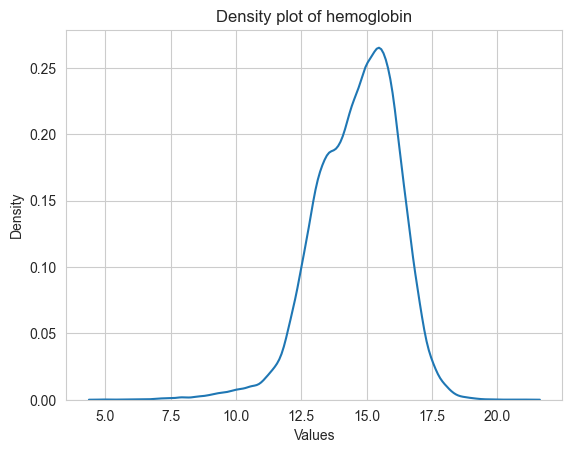

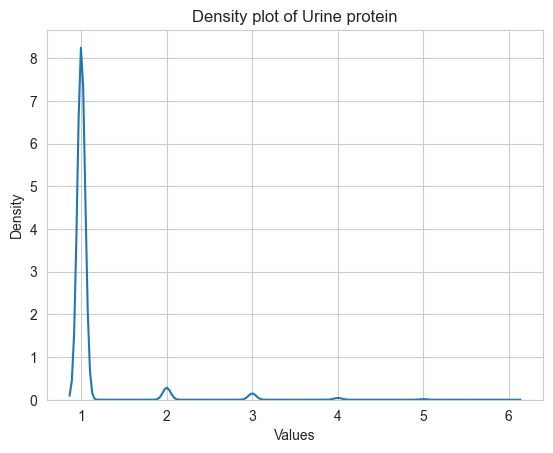

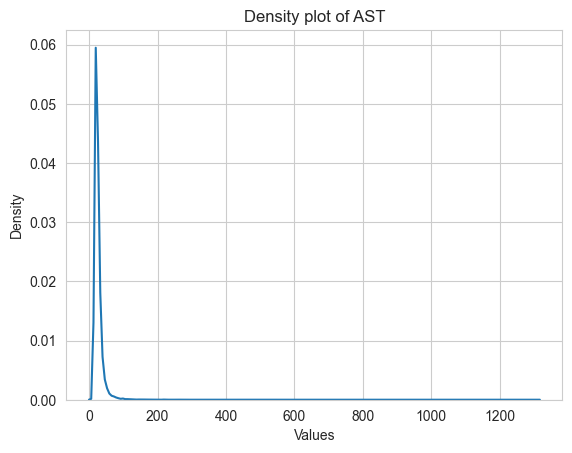

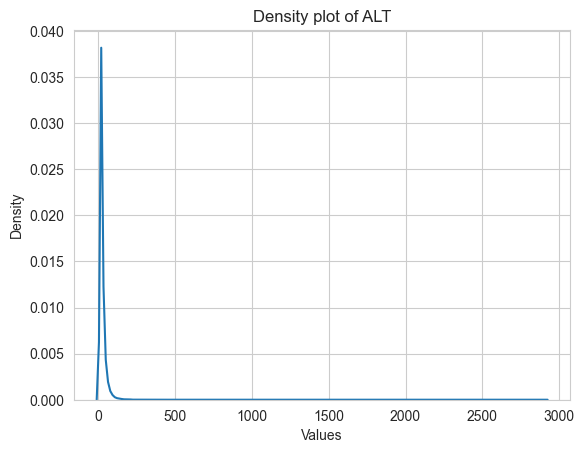

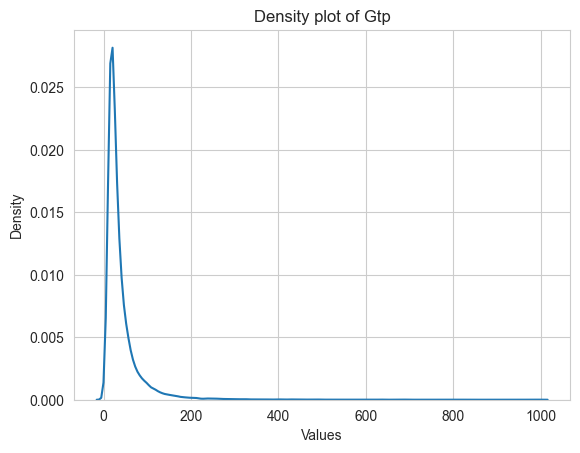

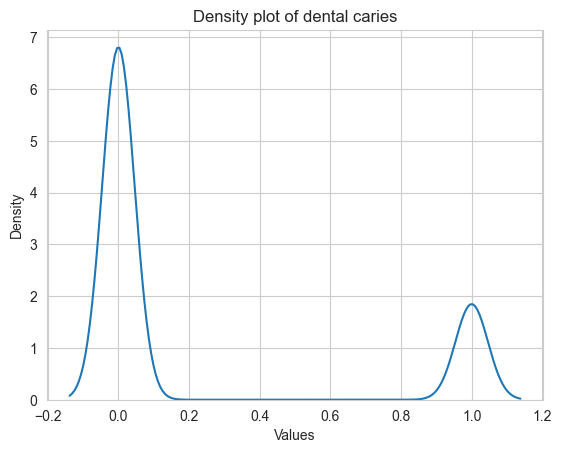

In [11]:
# Loop over each column in the DataFrame
for column_name in numeric_cols:
    
    sns.set_style("whitegrid")
    sns.kdeplot(data=df[column_name])
    plt.xlabel("Values")
    plt.title("Density plot of " + column_name)
    plt.show()

##### Here we use IQR to detect the outliers and be able to remove them

In [12]:
# Identify outliers
outliers = []
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)

# Drop outliers
df.drop(outliers, inplace=True)

In [13]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

- As we can see, we removed the outliers ..

In [14]:
df.shape

(28513, 26)

# Data Exploration and Visualization

In [15]:
df.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  28513.000000  28513.000000  28513.000000  28513.000000    28513.000000   
mean      43.696033    164.249816     64.132150     80.438372        1.013885   
std       11.494061      9.119491     11.643722      8.438047        0.295411   
min       20.000000    145.000000     35.000000     58.000000        0.300000   
25%       40.000000    155.000000     55.000000     74.500000        0.800000   
50%       40.000000    165.000000     65.000000     80.000000        1.000000   
75%       50.000000    170.000000     70.000000     86.000000        1.200000   
max       75.000000    185.000000    105.000000    106.000000        1.600000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     28513.000000        28513.0         28513.0  28513.000000   
mean          1.008382            1.0             1.0    119.544313   
std           0.293706            0.0             0.0     12.350543   
min           0.300000            1.0             1.0     85.000000   
25%           0.800000            1.0             1.0    110.000000   
50%           1.000000            1.0             1.0    119.000000   
75%           1.200000            1.0             1.0    129.000000   
max           1.600000            1.0             1.0    157.000000   

         relaxation  ...  triglyceride           HDL           LDL  \
count  28513.000000  ...  28513.000000  28513.000000  28513.000000   
mean      74.793077  ...    111.208010     57.861326    114.760565   
std        8.794111  ...     54.768955     12.969910     30.020007   
min       52.000000  ...      8.000000     21.000000     26.000000   
25%       69.000000  ...     70.000000     48.000000     94.000000   
50%       75.000000  ...     99.000000     57.000000    113.000000   
75%       80.000000  ...    140.000000     66.000000    135.000000   
max      100.000000  ...    289.000000     94.000000    202.000000   

         hemoglobin  Urine protein  serum creatinine           AST  \
count  28513.000000        28513.0      28513.000000  28513.000000   
mean      14.492894            1.0          0.872791     22.516045   
std        1.427702            0.0          0.196874      5.629155   
min       10.300000            1.0          0.100000      6.000000   
25%       13.400000            1.0          0.700000     18.000000   
50%       14.600000            1.0          0.900000     22.000000   
75%       15.600000            1.0          1.000000     26.000000   
max       19.100000            1.0         10.000000     41.000000   

                ALT           Gtp  dental caries  
count  28513.000000  28513.000000        28513.0  
mean      21.029390     26.338723            0.0  
std        9.294486     14.842243            0.0  
min        1.000000      3.000000            0.0  
25%       14.000000     16.000000            0.0  
50%       19.000000     22.000000            0.0  
75%       26.000000     33.000000            0.0  
max       55.000000     82.000000            0.0  

[8 rows x 22 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28513 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               28513 non-null  object 
 1   age                  28513 non-null  int64  
 2   height(cm)           28513 non-null  int64  
 3   weight(kg)           28513 non-null  int64  
 4   waist(cm)            28513 non-null  float64
 5   eyesight(left)       28513 non-null  float64
 6   eyesight(right)      28513 non-null  float64
 7   hearing(left)        28513 non-null  int64  
 8   hearing(right)       28513 non-null  int64  
 9   systolic             28513 non-null  int64  
 10  relaxation           28513 non-null  int64  
 11  fasting blood sugar  28513 non-null  int64  
 12  Cholesterol          28513 non-null  int64  
 13  triglyceride         28513 non-null  int64  
 14  HDL                  28513 non-null  int64  
 15  LDL                  28513 non-null 

<AxesSubplot: title={'center': 'Gender'}>

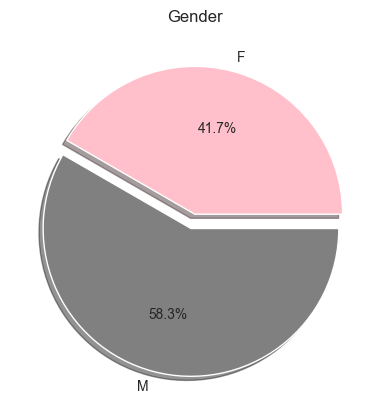

In [17]:
df.groupby('gender').size().plot(kind='pie', explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=["pink", "gray"], title="Gender")

<AxesSubplot: title={'center': 'Tartar'}, xlabel='Age', ylabel='Count'>

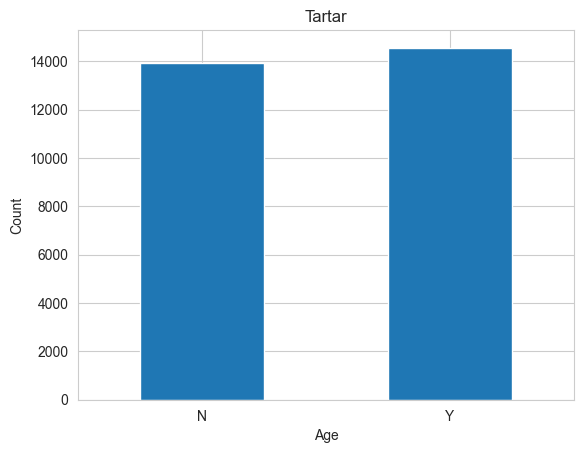

In [18]:
df.groupby('tartar').size().plot(kind='bar', title="Tartar", rot=0, xlabel='Age', ylabel='Count')

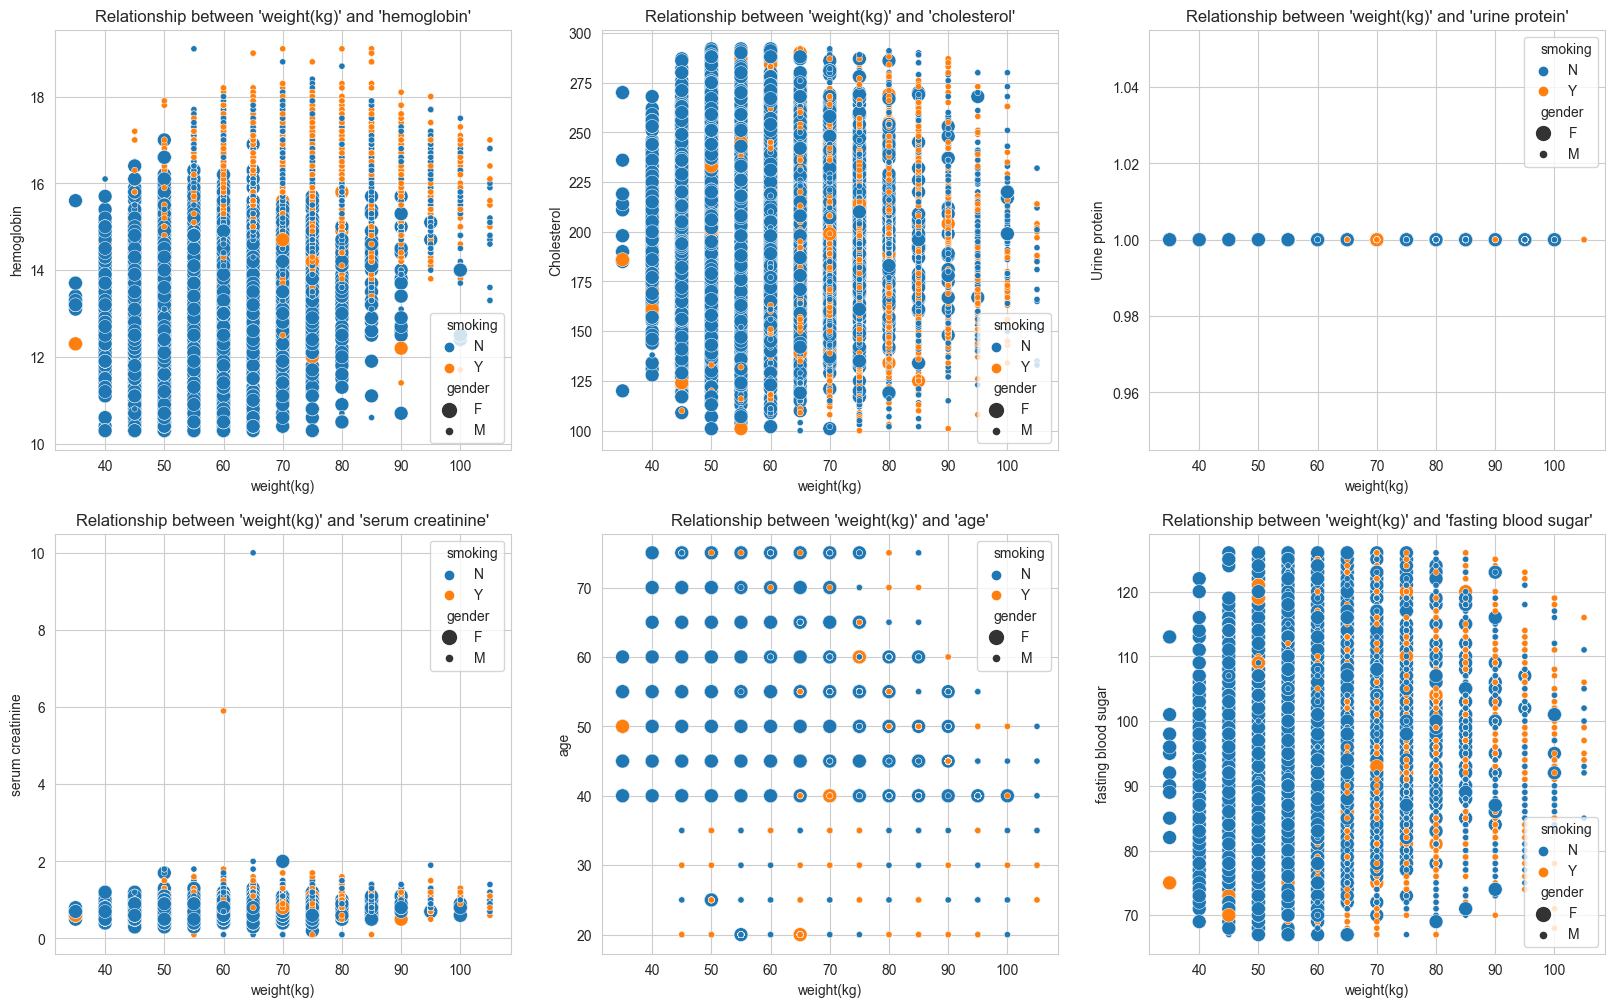

In [19]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "weight(kg)", y = "hemoglobin",
                hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'hemoglobin'");

sns.scatterplot(ax = axes[1], x = "weight(kg)", y = "Cholesterol", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'cholesterol'");

sns.scatterplot(ax = axes[2], x = "weight(kg)", y = "Urine protein", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'urine protein'");

sns.scatterplot(ax = axes[3], x = "weight(kg)", y = "serum creatinine", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'serum creatinine'");

sns.scatterplot(ax = axes[4], x = "weight(kg)", y = "age", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'age'");

sns.scatterplot(ax = axes[5], x = "weight(kg)", y = "fasting blood sugar", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'fasting blood sugar'");

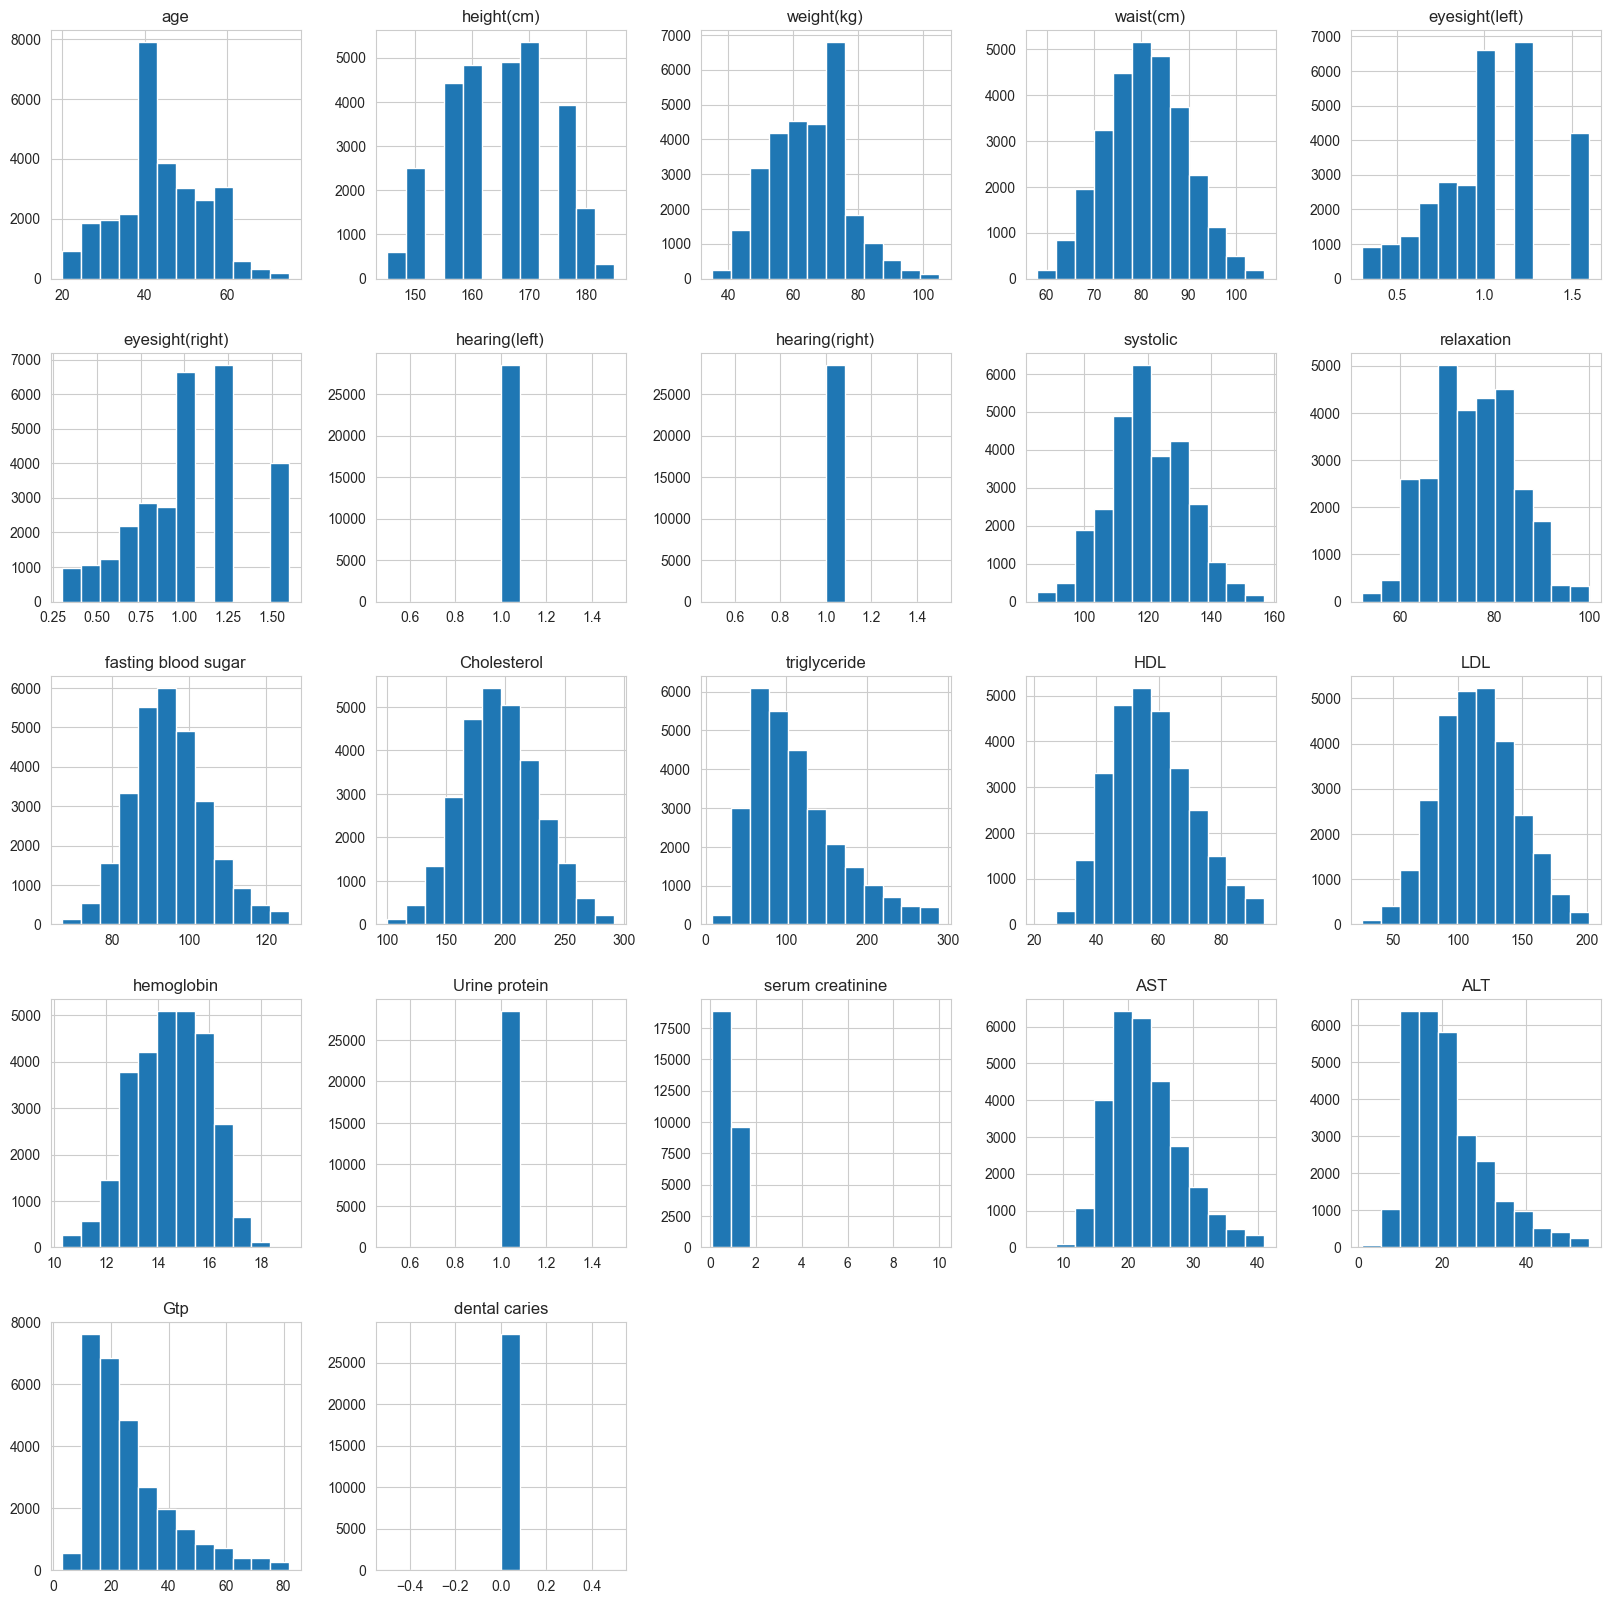

In [20]:
df.hist(figsize = (20, 20), bins = 12, legend = False);

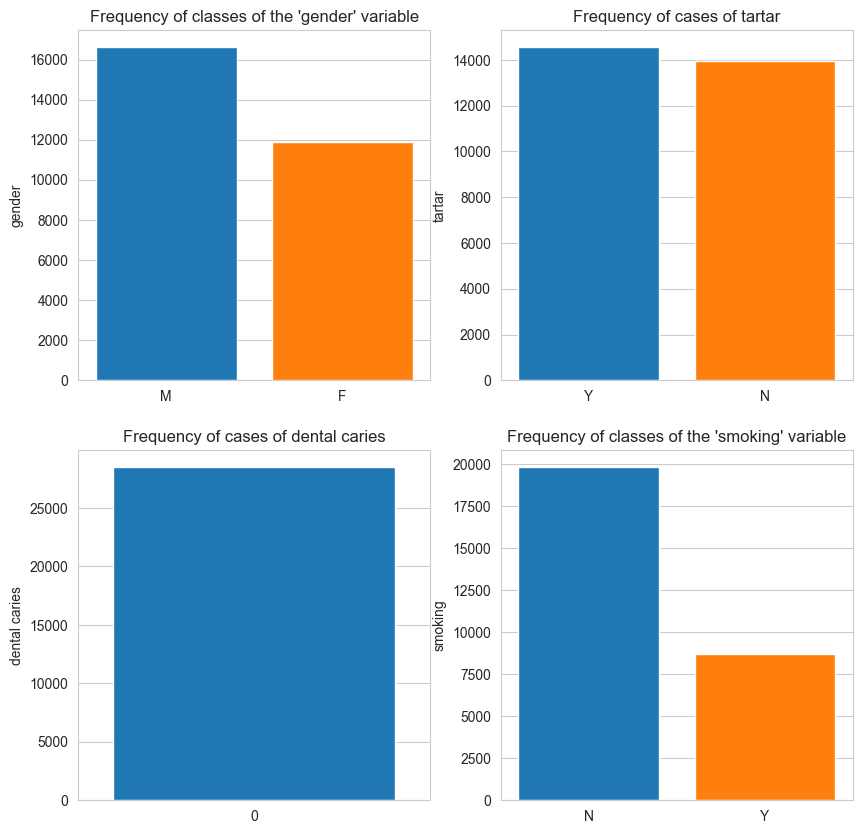

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = df["gender"].value_counts().index,
            y = df["gender"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the 'gender' variable");

sns.barplot(ax = axes[1],
            x = df["tartar"].value_counts().index,
            y = df["tartar"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of tartar");

sns.barplot(ax = axes[2],
            x = df["dental caries"].value_counts().index,
            y = df["dental caries"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of dental caries");

sns.barplot(ax = axes[3],
            x = df["smoking"].value_counts().index,
            y = df["smoking"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the 'smoking' variable");

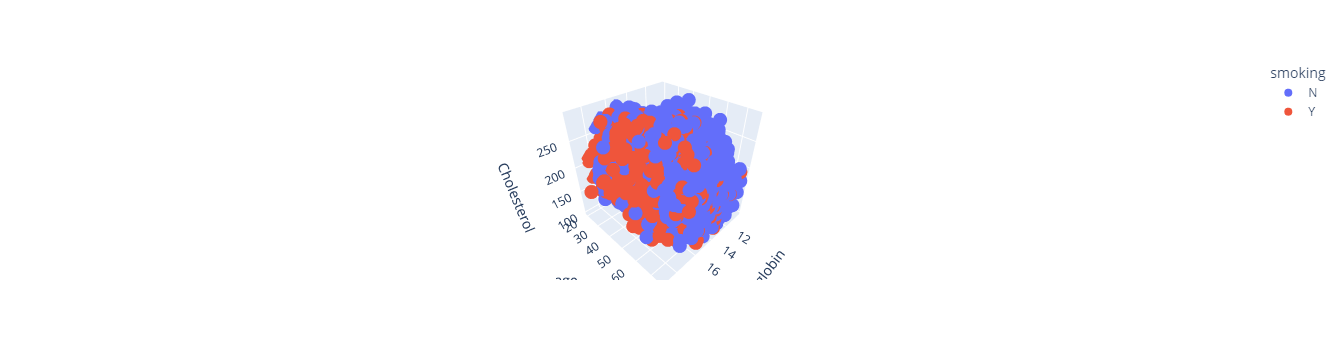

In [22]:
fig = px.scatter_3d(df, 
                    x = "hemoglobin",
                    y = "age",
                    z = "Cholesterol",
                    color="smoking")
fig.show();

### Observations based on the last explorations:<br>
1. The % of smokers within each blood pressure group is the highest among those who have hypertensive crisis and the least among those with normal blood pressure
2. Maximum people in the dataset have normal blood pressure
3. The highest number of nonsmokers is in the normal blood pressure
    Information source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
4. HDL (the good cholesterol) is higher for non-smokers.
5. Average LDL (the bad cholesterol) is higher for smokers.
6. AST and ALT are healthy for both smoker and non-smoker groups. GTP is at risk for smokers.

## Encoding and Splitting the data

In [23]:
lbe = LabelEncoder()
lbe.fit_transform(df["gender"])
df["gender"] = lbe.fit_transform(df["gender"])
lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])
lbe.fit_transform(df["smoking"])
df["smoking"] = lbe.fit_transform(df["smoking"])

In [24]:
df.head()

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       0   40         155          60       81.3             1.2   
2       1   55         170          60       80.0             0.8   
4       0   40         155          60       86.0             1.0   
5       1   30         180          75       85.0             1.2   
8       0   50         150          60       85.0             0.7   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
0              1.0              1               1       114  ...        12.9   
2              0.8              1               1       138  ...        15.8   
4              1.0              1               1       120  ...        12.5   
5              1.2              1               1       128  ...        16.2   
8              0.8              1               1       115  ...        13.7   

   Urine protein  serum creatinine  AST  ALT  Gtp  oral  dental caries  \
0              1               0.7   18   19   27     0              0   
2              1               1.0   21   16   22     0              0   
4              1               0.6   16   14   22     0              0   
5              1               1.2   18   27   33     0              0   
8              1               0.8   31   31   14     0              0   

   tartar  smoking  
0       1        0  
2       0        1  
4       0        0  
5       1        0  
8       0        0  

[5 rows x 26 columns]

In [25]:
# select dependent variable (label)
y = df["smoking"]

# select independent variable (estimator)
x = df.drop("smoking", axis = 1)

In [26]:
# Train-Test-Split   
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, shuffle = True, random_state=1)

## Scaling the data

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Classification Models

#### To find a optimum value of K we plot a graph of error rate vs K value ranging from 0 to 40

- From the previous graph will observe that the minimum error rate approximately equal 25 % and this percentage occurs when K value = 31

### Support Vector Machine (SVM) Model 

In [33]:
svm = SVC(kernel='rbf')
# fit the model with data
svm.fit(x_train, y_train)
# predict with test dataset
y_predict_SVM = svm.predict(x_test)
print(classification_report(y_test,y_predict_SVM))
accuracy_Score_SVM = metrics.accuracy_score(y_test, y_predict_SVM)
print('SVM model accuracy is: {:.2f}%'.format(accuracy_Score_SVM*100))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3964
           1       0.64      0.61      0.62      1739

    accuracy                           0.78      5703
   macro avg       0.73      0.73      0.73      5703
weighted avg       0.77      0.78      0.77      5703

SVM model accuracy is: 77.54%


### Confusion Matrix for SVM

Confusion Matrix for SVM :
 [[3361  603]
 [ 678 1061]] 



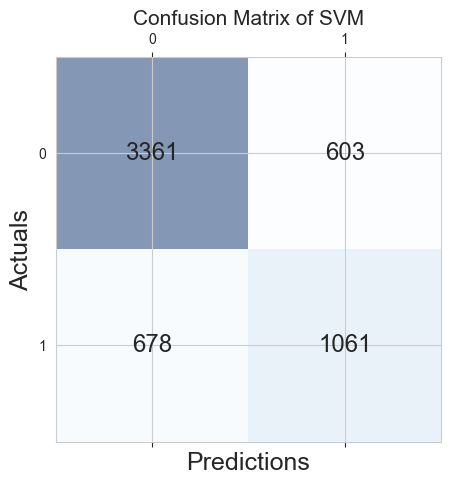

In [34]:
cm = metrics.confusion_matrix(y_test, y_predict_SVM)
print('Confusion Matrix for SVM :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of SVM', fontsize=15)
plt.show()

### Random Forest Classifier  Model 

In [35]:
models = RandomForestClassifier(n_estimators=2000)
models.fit(x_train, y_train)
# predict with test dataset
y_predict_random = models.predict(x_test)
print(classification_report(y_test,y_predict_random))
accuracy_Score_random = metrics.accuracy_score(y_test, y_predict_random)
print('RandomForest model accuracy is: {:.2f}%'.format(accuracy_Score_random*100))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3964
           1       0.76      0.70      0.73      1739

    accuracy                           0.84      5703
   macro avg       0.81      0.80      0.81      5703
weighted avg       0.84      0.84      0.84      5703

RandomForest model accuracy is: 83.96%


### Confusion Matrix for Random Forest Classifier

Confusion Matrix for Random Forest Classifier :
 [[3571  393]
 [ 522 1217]] 



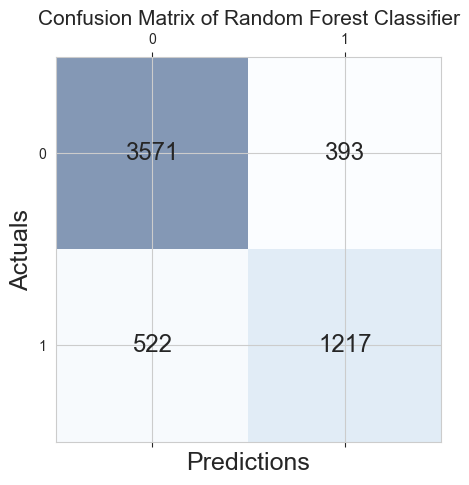

In [36]:
cm = metrics.confusion_matrix(y_test, y_predict_random)
print('Confusion Matrix for Random Forest Classifier :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Random Forest Classifier', fontsize=15)
plt.show()

### Gradient Boosting Classifier Model 

In [39]:
xgb_model = XGBClassifier(n_estimators = 2000)
xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_test)
print(classification_report(y_test,pred_xgb))
accuracy_Score_xgb = metrics.accuracy_score(y_test, pred_xgb)
print('xgb model accuracy is: {:.2f}%'.format(accuracy_Score_xgb*100))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3964
           1       0.73      0.70      0.71      1739

    accuracy                           0.83      5703
   macro avg       0.80      0.79      0.79      5703
weighted avg       0.83      0.83      0.83      5703

xgb model accuracy is: 82.78%
